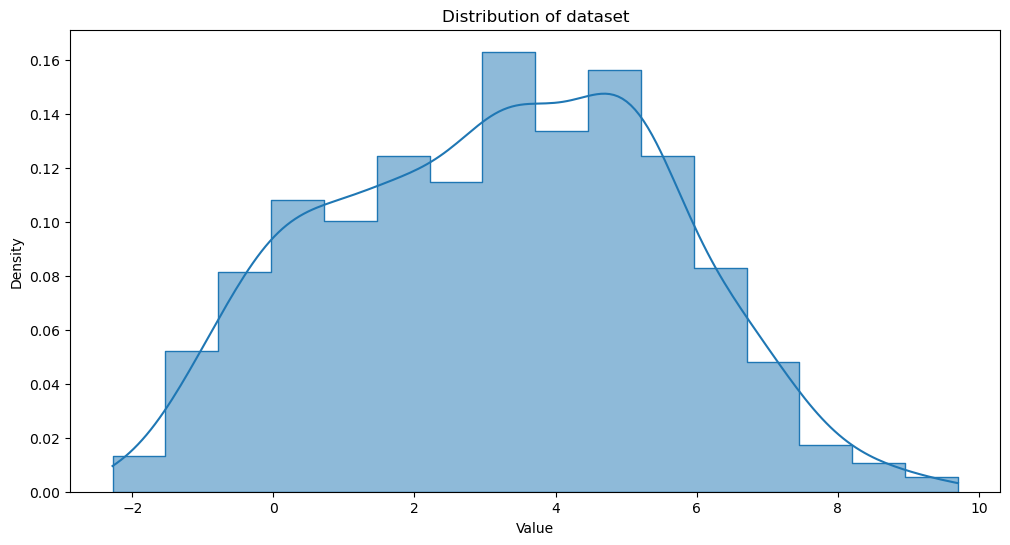

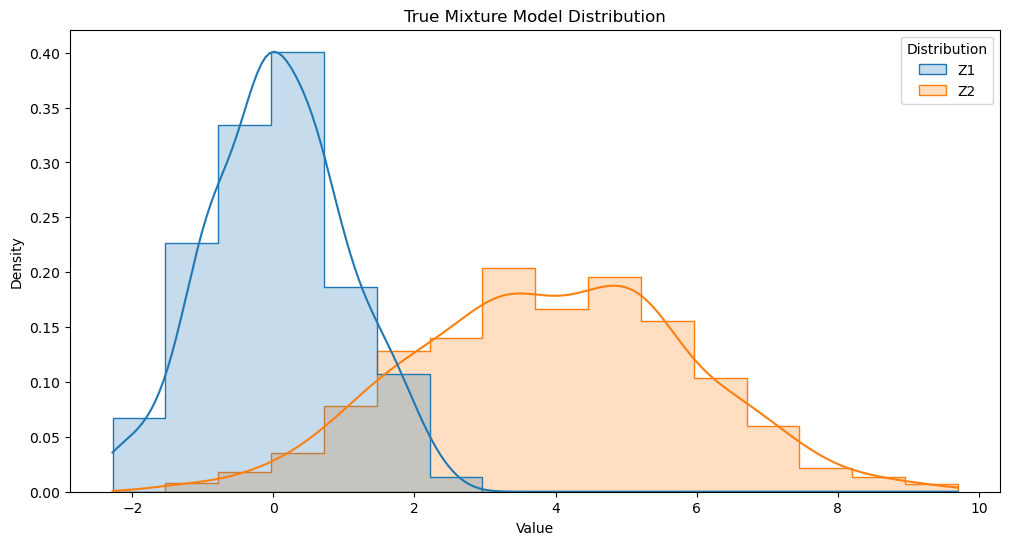

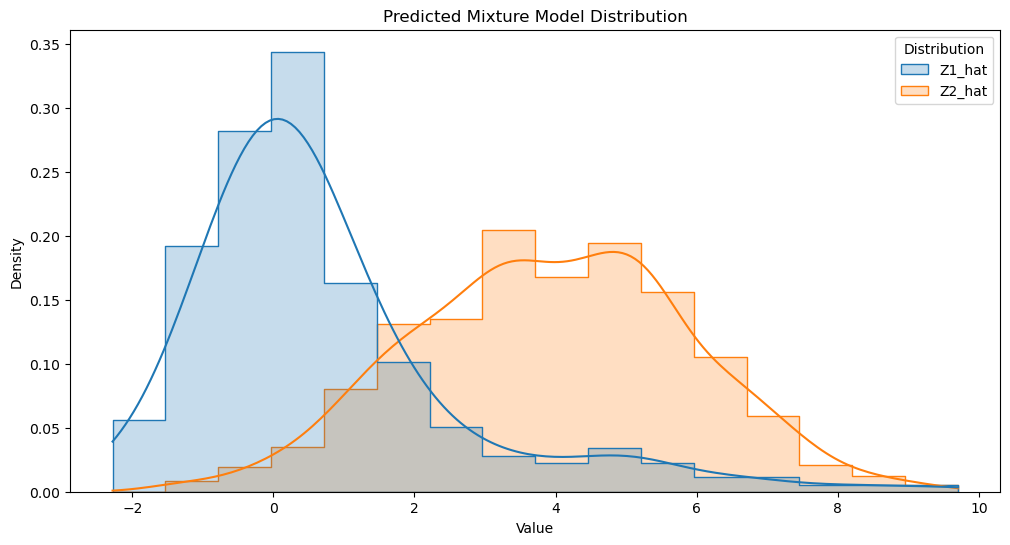

In [3]:
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
import pandas as pd
import json

# Actual size of data set and true Pi values
N = 1000
Pi1 = 0.2
Pi2 = 0.8

# Load data from the JSON file
with open('data.json', 'r') as file:
    data = json.load(file)

# Extract data
X = data['X']
mus = data['mus']
sigmas = data['sigmas']
probs = data['probs']

Z1len = round(N * Pi1)
Z2len = N-Z1len


C = ['Z1'] * Z1len + ['Z2'] * Z2len  # Labels for the distributions
data = pd.DataFrame({'Value': X, 'Distribution': C})

# Plot the data
plt.figure(figsize=(12, 6))
sns.histplot(data, x='Value', element='step', stat='density', common_norm=False, kde=True)
plt.title('Distribution of dataset')
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()
plt.close()

plt.figure(figsize=(12, 6))
sns.histplot(data, x='Value', hue='Distribution', element='step', stat='density', common_norm=False, kde=True)
plt.title('True Mixture Model Distribution')
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()
plt.close()

Z1_hat = np.random.normal(mus[0], sigmas[0], round(N * probs[0]))
Z2_hat = np.random.normal(mus[1], sigmas[1], round(N * probs[1]))
C = ['Z1_hat'] * len(Z1_hat) + ['Z2_hat'] * len(Z2_hat)  # Labels for the distributions
X_hat = np.concatenate((Z1_hat, Z2_hat))
data = pd.DataFrame({'Value': X, 'Distribution': C})
plt.figure(figsize=(12, 6))
sns.histplot(data, x='Value', hue='Distribution', element='step', stat='density', common_norm=False, kde=True)
plt.title('Predicted Mixture Model Distribution')
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()